In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

In [2]:
cs=pd.read_csv("Consumer Research.csv")

In [9]:
cs.describe()


,"Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I consider recommendations from friends & family before deciding to try a new app]","Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I consider social media recommendations before trying a new app]","Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I prefer to purchase online because of the widely available options]","Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I prefer to purchase online because it is cheaper online]","Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I prefer to purchase online to avoid the hassle of leaving the home]","Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I trust the reviews made by reviewers online on apps]","Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I consider reviews before making a purchase decision]","Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I am brand loyal about the purchases I make when I purchase online]","Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I am willing to try new brands online when I purchase online]","Answer the following questions based on how strongly do you agree or disagree (1=Strongly Disagree, 2=Disagree,3=Neutral,4=Agree,5=Strongly Agree) [I am price sensitive when I purchase online]"
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,3.149502,3.049834,3.076412,2.707641,3.385382,3.006645,3.485050,3.076412,3.202658,3.465116
std,1.361705,1.225088,1.231858,1.244016,1.305496,1.186011,1.207177,1.198947,1.178471,1.150194
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
attr=cs.iloc[:,15:25]
fa = FactorAnalyzer(n_factors=3, rotation='varimax', method='principal')
fa.fit(attr)
scores=fa.transform(attr)
fs=pd.DataFrame(scores, columns=['Fact1','Fact2','Fact3'])
load=pd.DataFrame(fa.loadings_, columns=['Corr_F1','Corr_F2','CorrF3'])
comm=pd.DataFrame(fa.get_communalities(), columns=['Communality'])
eigen= fa.get_eigenvalues()[0]
eigen_pct=pd.DataFrame(eigen/sum(eigen), columns=['Var%'])
fa_output=pd.concat([eigen_pct, comm,load],axis=1)
fa_output.index=attr.columns 
fa_output.index.name='Result'
cs_new=pd.concat([cs,fs], axis=1)
cs_new.index.name='S_No'


writer = pd.ExcelWriter('Consumer Research Factor Analysis(3-factor)', engine='xlsxwriter')
cs_new.to_excel(writer, 'Factor Analysis')
fa_output.to_excel(writer,'FA_Output')
writer.save()

In [12]:
attr.columns=["Consider recom from friends",'consider recomm from social media',"Available options","Online cheap","Hassle of leaving home","trust reviews","Consider reviews","Brand loyal","Willing to try new brands","Price Sensitive"]

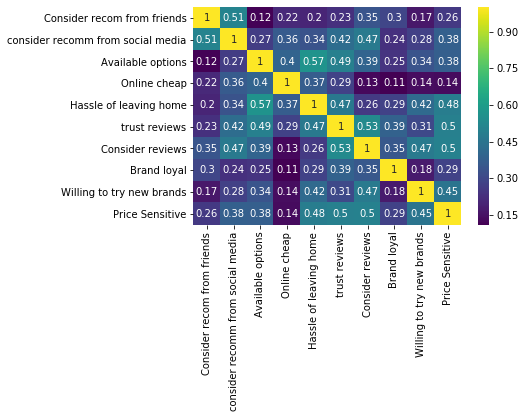

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
corr=attr.corr()
sns.heatmap(corr,cmap='viridis',annot=True)